In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
data=pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,id,created_at,updated_at,name,description,status,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,...,Goal 5: Gender Equality,Goal 1: No Poverty,"Goal 9: Industry, Innovation and Infrastructure",Goal 2: Zero Hunger,Goal 11: Sustainable Cities and Communities,"Goal 16: Peace, Justice and Strong Institutions",Goal 10: Reduced Inequalities,Goal 14: Life Below Water,VER_retired_credits,VER_issued_credits
0,0,1001,2019-03-27 13:52:28+00:00,2022-01-20 06:04:23+00:00,"Prony and Kafeate wind-farms, New Caledonia (3...",The project activity involves six wind farms l...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,36339,2008-04-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361396.0,464170.0
1,1,1002,2019-03-27 13:52:28+00:00,2022-11-17 01:11:15+00:00,Amayo 40 MW Wind Power Project – Nicaragua,The main objective of the Amayo Wind Power Pro...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,120811,2021-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,97279.0
2,2,1003,2019-03-27 13:52:28+00:00,2022-06-08 04:14:19+00:00,Renewable Energy Power project by DDWL,The main purpose of this project activity is t...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,58947,2020-10-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3171.0,63911.0
3,3,1007,2019-03-27 13:52:28+00:00,2022-07-14 12:23:24+00:00,"Cataltepe 16MW Wind Farm Project, Turkey","The Cataltepe 16 MW Wind Farm Project, Turkey,...",GOLD_STANDARD_CERTIFIED_PROJECT,v1 CASH,39724,2011-04-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35869.0,35869.0
4,4,1009,2019-03-27 13:52:29+00:00,2022-12-14 02:28:59+00:00,"Kuyucak 25.6 MW Wind Farm Project, Turkey","The Kuyucak 25,6 MW Wind Farm Project, Turkey,...",GOLD_STANDARD_CERTIFIED_PROJECT,v1 CASH,71578,2017-11-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147376.0,148645.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,1357,992,2019-03-27 13:52:26+00:00,2022-01-05 12:27:23+00:00,GS4424 VPA2 African Cookstoves and Water Prorg...,The Micro-Scale Voluntary Project Activity 2 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17955.0,33561.0
1358,1358,993,2019-03-27 13:52:26+00:00,2022-01-05 12:32:11+00:00,GS4424 VPA3 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 3 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15589.0,33595.0
1359,1359,994,2019-03-27 13:52:26+00:00,2022-01-05 12:39:55+00:00,GS4424 VPA4 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 4 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19959.0,33306.0
1360,1360,995,2019-03-27 13:52:27+00:00,2022-01-05 12:42:50+00:00,GS4424 VPA5 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 5 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9179,2015-12-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14546.0,33530.0


In [3]:
data['VER_percentage_sold']=data['VER_retired_credits']/data['VER_issued_credits']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       1362 non-null   int64  
 1   id                                               1362 non-null   int64  
 2   created_at                                       1362 non-null   object 
 3   updated_at                                       1362 non-null   object 
 4   name                                             1362 non-null   object 
 5   description                                      1362 non-null   object 
 6   status                                           1362 non-null   object 
 7   gsf_standards_version                            1362 non-null   object 
 8   estimated_annual_credits                         1362 non-null   int64  
 9   crediting_period_start_date   

In [5]:
import matplotlib.pyplot as plt

In [6]:
data.columns[1]

'id'

Text(0.5, 1.0, 'VER Percentage Credits Sold')

<Figure size 800x400 with 0 Axes>

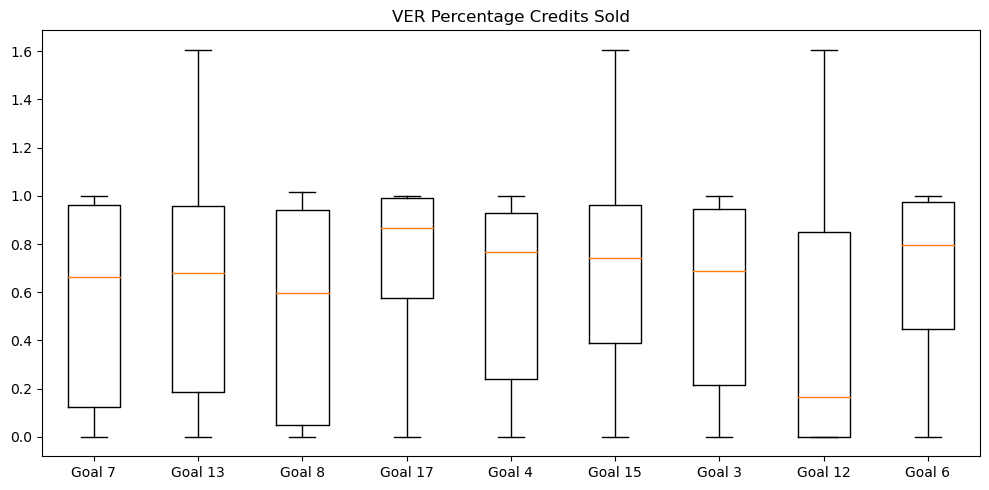

In [7]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(10,5),layout='tight')
goals_sales={}
for i in range(0,9):
    colname=data.columns[25+i]
    colname=colname.split(':',1)[0]
    goals_sales[colname]=list(data[data.iloc[:,25+i]==True]['VER_percentage_sold'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.title('VER Percentage Credits Sold')

Text(0.5, 1.0, 'VER Number of Credits Sold')

<Figure size 800x400 with 0 Axes>

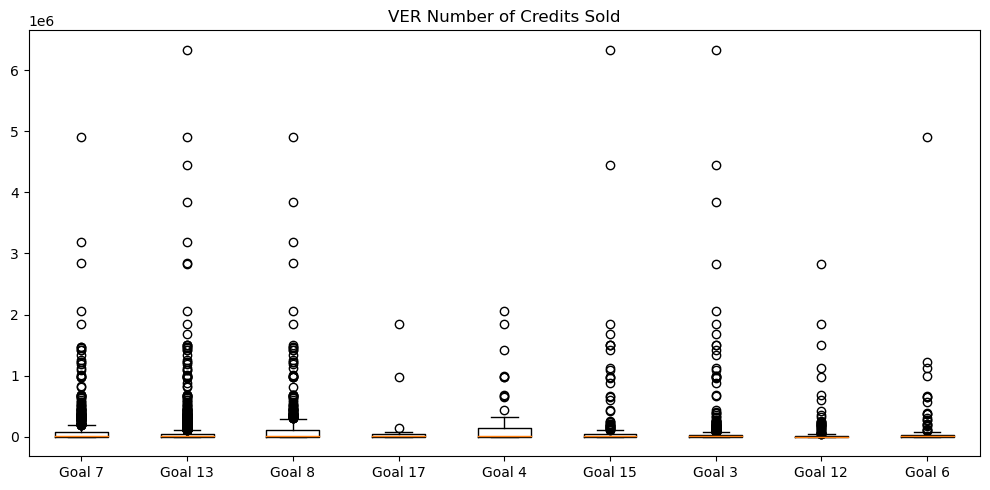

In [8]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(10,5),layout='tight')
goals_sales={}
for i in range(0,9):
    colname=data.columns[25+i]
    colname=colname.split(':',1)[0]
    goals_sales[colname]=list(data[data.iloc[:,25+i]==True]['VER_retired_credits'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.title('VER Number of Credits Sold')

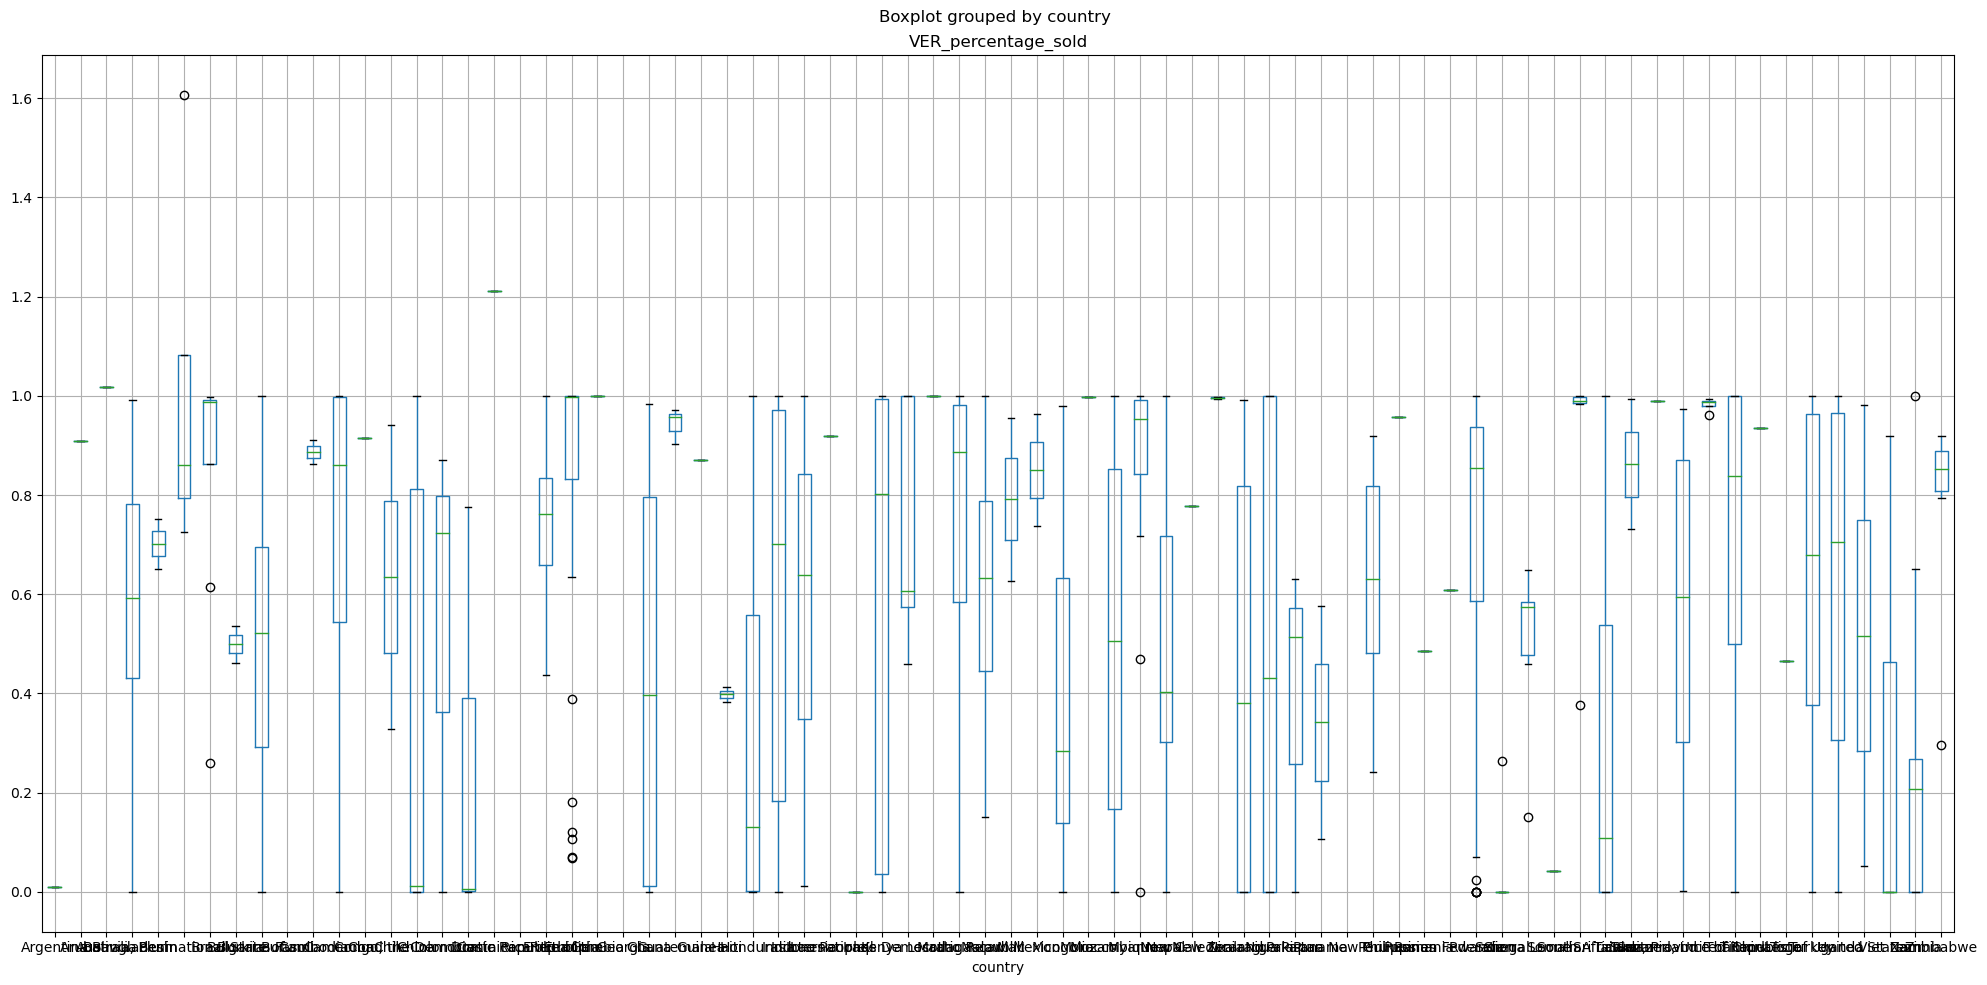

In [9]:
data.boxplot('VER_percentage_sold',by='country',figsize=(20,10))
plt.tight_layout()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       1362 non-null   int64  
 1   id                                               1362 non-null   int64  
 2   created_at                                       1362 non-null   object 
 3   updated_at                                       1362 non-null   object 
 4   name                                             1362 non-null   object 
 5   description                                      1362 non-null   object 
 6   status                                           1362 non-null   object 
 7   gsf_standards_version                            1362 non-null   object 
 8   estimated_annual_credits                         1362 non-null   int64  
 9   crediting_period_start_date   

In [11]:
data['created_at'].min()

'2019-03-27 13:49:27+00:00'

In [12]:
data['type'].value_counts()

Energy Efficiency - Domestic                663
Wind                                        219
Biogas - Heat                               156
Solar Thermal - Electricity                  92
Small, Low - Impact Hydro                    56
Other                                        55
Biogas - Electricity                         37
Solar Thermal - Heat                         23
Biomass, or Liquid Biofuel - Heat            16
Biomass, or Liquid Biofuel - Electricity     14
Biogas - Cogeneration                        12
Energy Efficiency - Industrial                7
Geothermal                                    7
Energy Efficiency - Public Sector             3
Energy Efficiency - Transport Sector          2
Name: type, dtype: int64

In [13]:
sus_goals_df = pd.melt(data, id_vars = ['id', 'VER_retired_credits'], \
value_vars= ['Goal 7: Affordable and Clean Energy', 'Goal 8: Decent Work and Economic Growth', 'Goal 1: No Poverty', 'Goal 6: Clean Water and Sanitation', 'Goal 5: Gender Equality', 'Goal 15: Life On Land', 'Goal 12: Responsible Production and Consumption'],\
value_name= 'Met/ Unmet', var_name= 'Sustainability Goals')

sus_goals_df

,id,VER_retired_credits,Sustainability Goals,Met/ Unmet
0,1001,361396.0,Goal 7: Affordable and Clean Energy,True
1,1002,0.0,Goal 7: Affordable and Clean Energy,True
2,1003,3171.0,Goal 7: Affordable and Clean Energy,True
3,1007,35869.0,Goal 7: Affordable and Clean Energy,True
4,1009,147376.0,Goal 7: Affordable and Clean Energy,True
...,...,...,...,...
9529,992,17955.0,Goal 12: Responsible Production and Consumption,False
9530,993,15589.0,Goal 12: Responsible Production and Consumption,False
9531,994,19959.0,Goal 12: Responsible Production and Consumption,False
9532,995,14546.0,Goal 12: Responsible Production and Consumption,False


In [14]:
sus_goals_df = sus_goals_df.loc[sus_goals_df['Met/ Unmet'], :]
sus_goals_df

ValueError: Cannot mask with non-boolean array containing NA / NaN values

### The plot below is inaccurate as the data consists of NaN values, requires cleaning

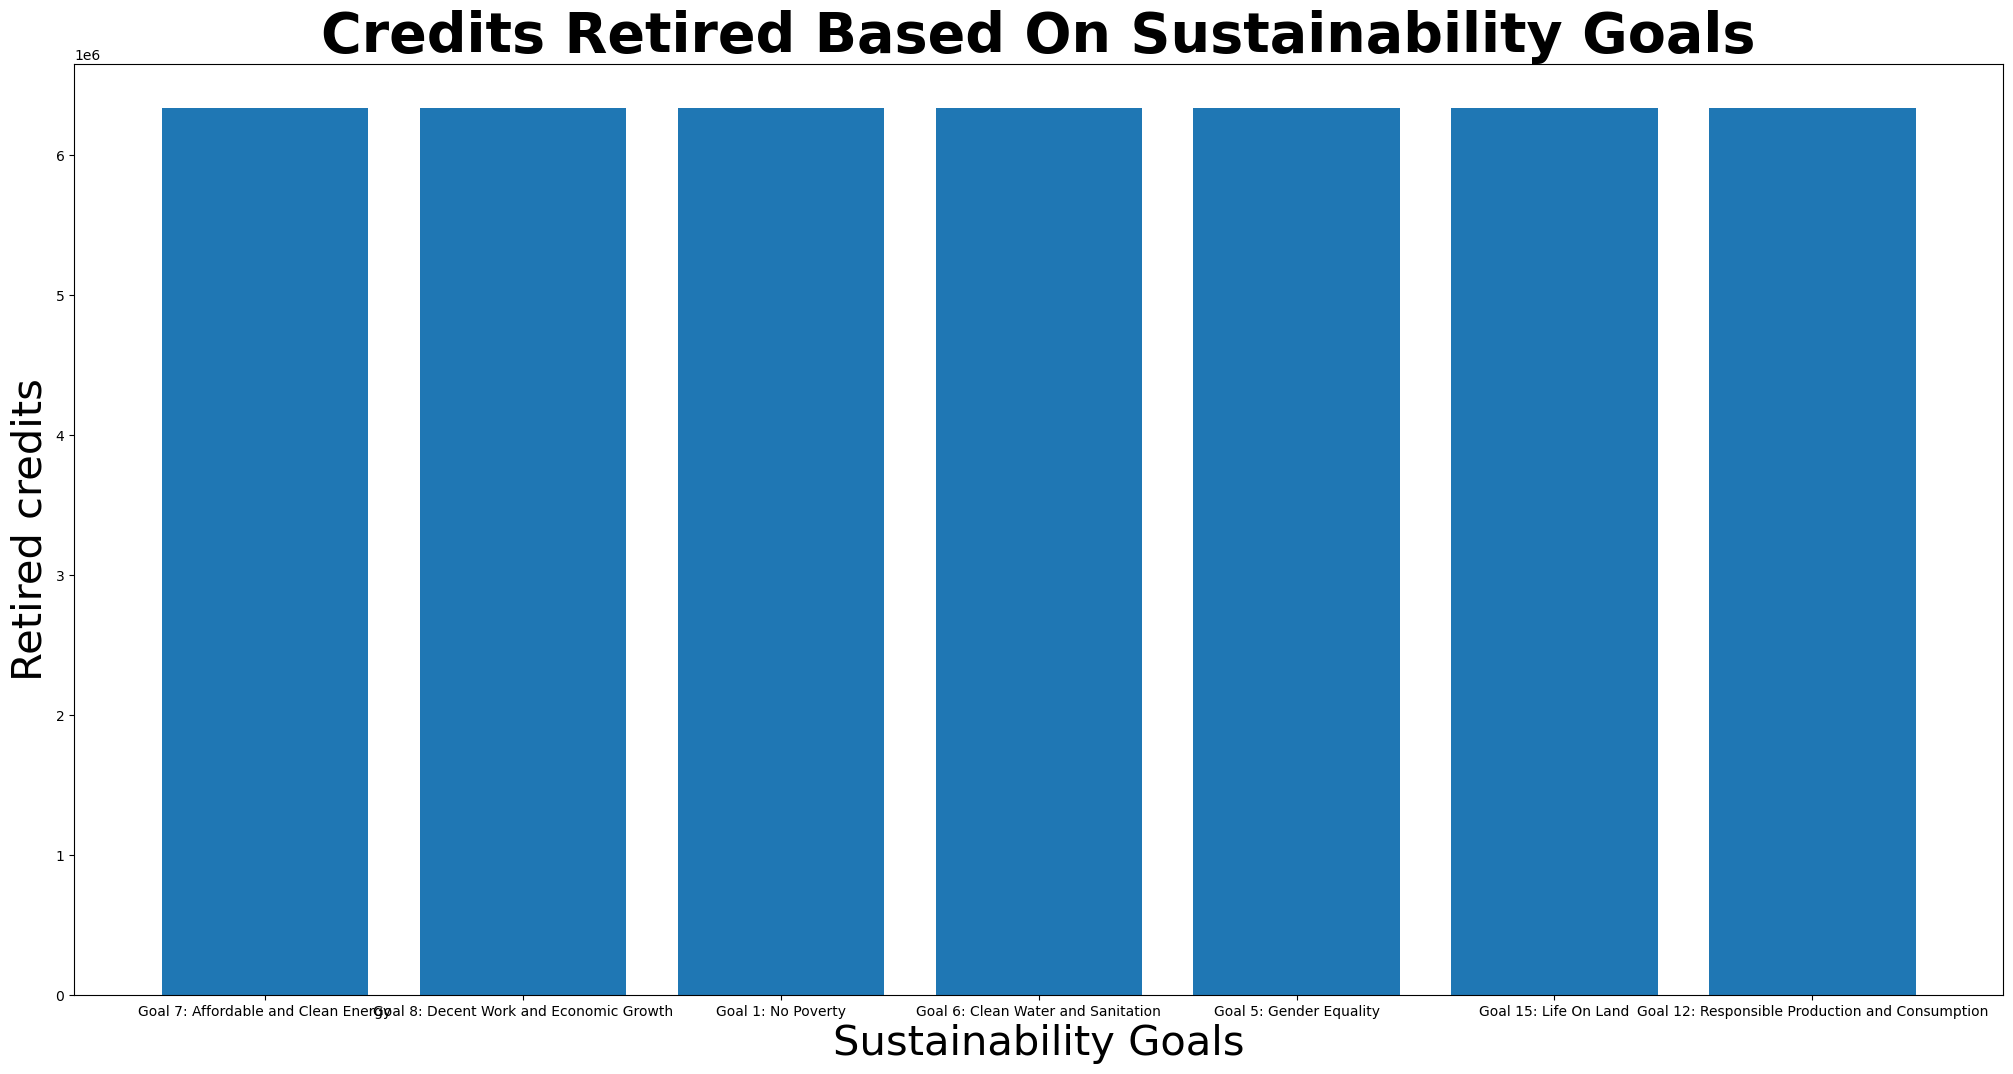

In [15]:
plt.rcParams.update(plt.rcParamsDefault) #Line to reset everything in Matplotlib to default
plt.figure(figsize=(20,10)) 
fig = plt.bar(sus_goals_df['Sustainability Goals'], sus_goals_df['VER_retired_credits'])
plt.tight_layout()

# Adding & Styling lables and title 
plt.xlabel("Sustainability Goals", fontsize = 30)
plt.ylabel("Retired credits", fontsize = 30)
plt.title("Credits Retired Based On Sustainability Goals",fontweight="bold", fontsize = 40)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()